![Stryke Force Logo](https://avatars3.githubusercontent.com/u/20849460?v=3&s=200)

# Hough Line Transform
Let's experiment locating a target with the [Hough Line Transform](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html).

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['image.cmap'] = 'gray'

## The Original Image

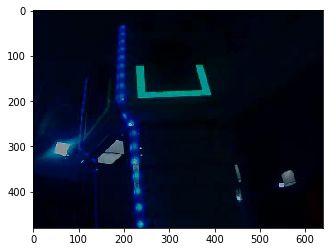

In [2]:
bgr_image = cv2.imread("images/15.jpg")
plt.imshow(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB))
plt.show()

## HSV Color Range Selection

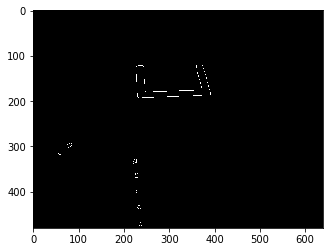

In [3]:
# gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
# edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

hsv_target_color = (178 // 2, 1.0 * 255, .61 * 255)
hsv_target_lower = (hsv_target_color[0] - 5, 100, 100)
hsv_target_upper = (hsv_target_color[0] + 5, 255, 255)

hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
hsv_blurred_image = cv2.GaussianBlur(hsv_image, (5, 5), 0)
edges = cv2.inRange(hsv_blurred_image, hsv_target_lower, hsv_target_upper)
edges = cv2.Canny(edges, 50, 150, apertureSize=3)


plt.imshow(edges)
plt.show()

## Hough Tranform

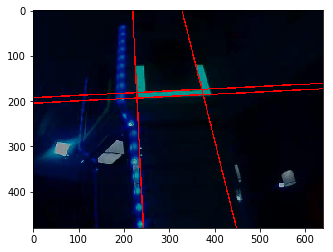

In [4]:
lines = cv2.HoughLines(edges.copy(), 1, np.pi/64, 40)
display_image = bgr_image.copy()
# lines
for line in lines:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
#         print(rho, theta)

        cv2.line(display_image,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(cv2.cvtColor(display_image, cv2.COLOR_BGR2RGB))
plt.show()

## Probabilistic Hough Transform

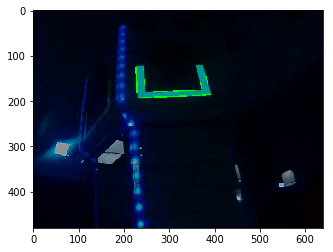

In [5]:
minLineLength = 100
maxLineGap = 10

display_image = bgr_image.copy()

lines = cv2.HoughLinesP(edges.copy(), 1, np.pi/64, 25, minLineLength, maxLineGap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(display_image,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(cv2.cvtColor(display_image, cv2.COLOR_BGR2RGB))
plt.show()